# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


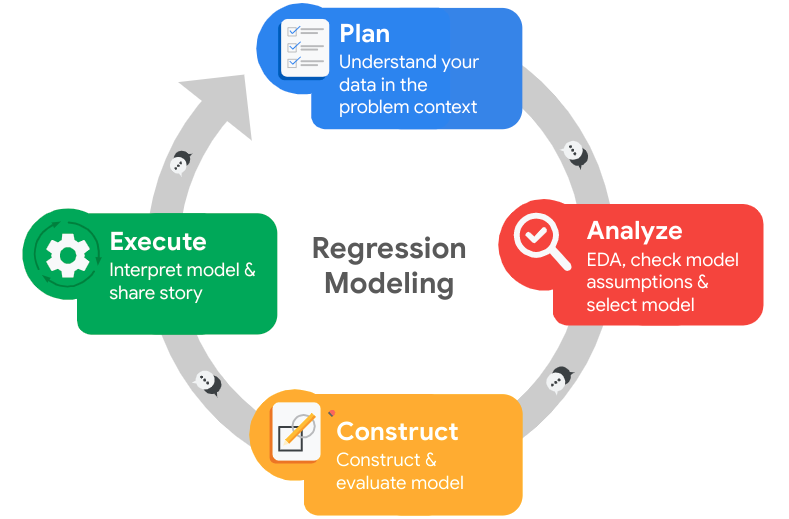

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Stakeholders**: Salifort Motors Leadership, HR Department, Department Managers, Employees

**Goal**: Identify key drivers of employee turnover at Salifort Motors and develop a predictive model to determine the likelihood of an employee leaving. Finally provide actionable insights to reduce turnovers, improve job satisfaction, and employee retention.

**Ethical Considerations**
 - Data Privacy and Confidentiality
 - Bias in Data and Model
 - Transparencty and Interpretability
 - Impact of Recommendations

### Import packages

In [46]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, \
classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier

from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import pickle

### Load dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Gather basic information about the data

In [31]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [3]:
# Display all column names
### YOUR CODE HERE ###
df0.columns = df0.columns.str.lower()
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [6]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [7]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [4]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.duplicated()
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0_subset = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0_subset.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

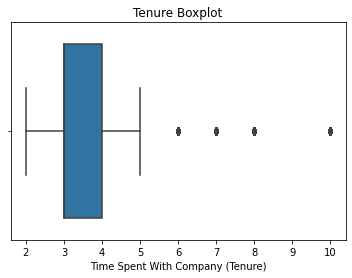

In [5]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
# Create figure and axis
fig, ax = plt.subplots()

# Create boxplot
sns.boxplot(x=df0_subset['time_spend_company'], ax=ax)

# Set title and labels
ax.set_title('Tenure Boxplot')
ax.set_xlabel('Time Spent With Company (Tenure)')

# Show the plot
plt.show()

In [5]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
q1 = df0_subset['time_spend_company'].quantile(0.25)
q3 = df0_subset['time_spend_company'].quantile(0.75)
iqr = q3 - q1
low_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)

outliers = df0_subset[(df0_subset['time_spend_company'] > upper_limit) | (df0_subset['time_spend_company'] < low_limit)] 
len(outliers)

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [6]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df0_subset['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df0_subset['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

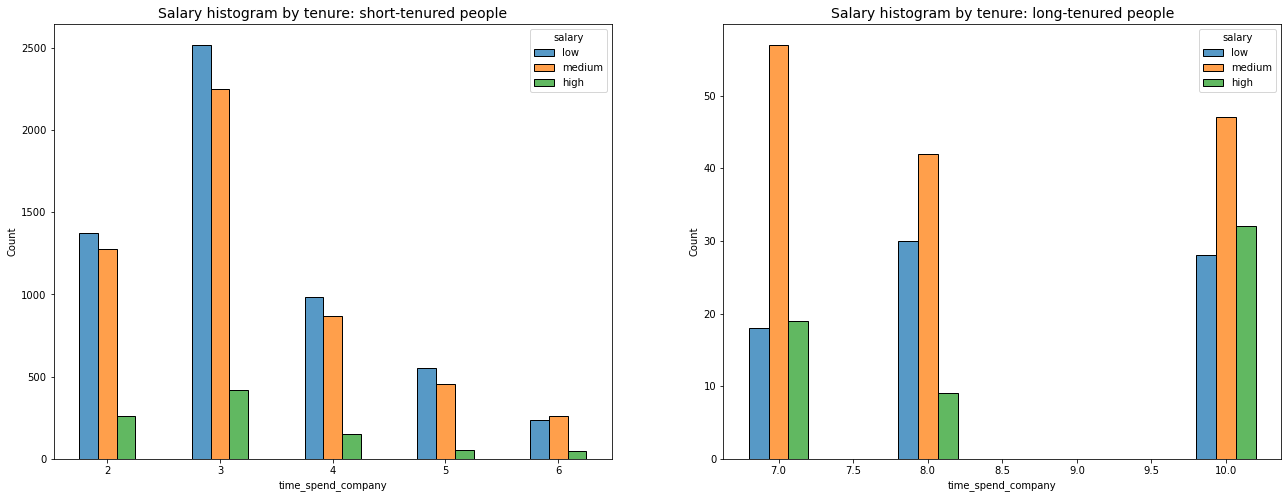

In [9]:
# Create a plot as needed
### YOUR CODE HERE ###

#Shows the comparison of Tenure between those who left and did not
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df0_subset[df0_subset['time_spend_company'] < 7]

# Define long-tenured employees
tenure_long = df0_subset[df0_subset['time_spend_company'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='time_spend_company', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

# While in short tenure people, it was mostly low salary workers that left; in the long-tenured people, 
# it was mostly the people with medium salary that left and by a lot
# Workers that worked between 8.5-9.5 years did not leave significantly


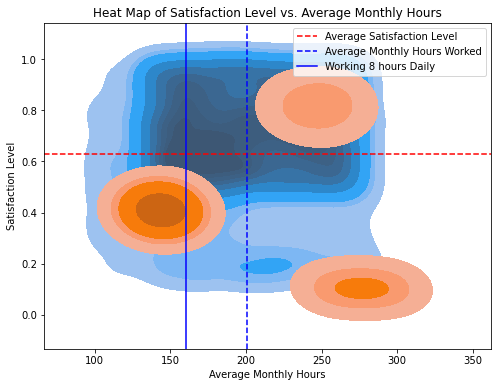

In [10]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize = (8,6))
fig = sns.kdeplot(data = df0_subset, x = 'average_montly_hours', y = 'satisfaction_level', hue = 'left', cmaps='Reds', fill = True, ax = ax, legend = True)
ax.set_title('Heat Map of Satisfaction Level vs. Average Monthly Hours')
ax.set_xlabel('Average Monthly Hours')
ax.set_ylabel('Satisfaction Level')
ax.axhline(df0_subset['satisfaction_level'].mean(), color = 'red', linestyle='--', label = "Average Satisfaction Level")
ax.axvline(df0_subset['average_montly_hours'].mean(), color = 'blue',linestyle='--', label = 'Average Monthly Hours Worked')
ax.axvline(160, color = 'blue',linestyle='-', label = 'Working 8 hours Daily')
ax.legend()
plt.show()

# We can see that these workers at Salifort on average worked more than the regular american workers that have an 8hr workday.
# There is somewhat of a positive correlation between the amount hours worked monthly and satisfaction level. (Surprising)
# Although is somewhat of an outlier where workers w 250-350hrs monthly have a very low satisfaction level.

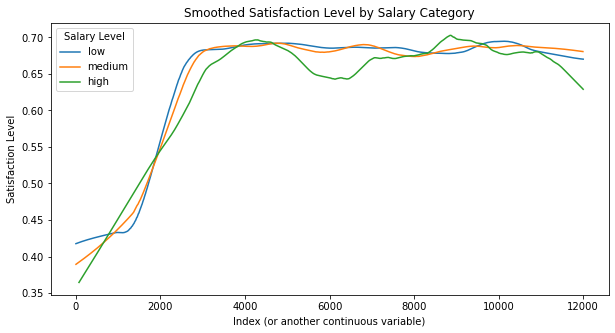

low       0.478692
medium    0.438746
high      0.082562
Name: salary, dtype: float64

In [11]:
# Create a plot as needed
### YOUR CODE HERE ###
import statsmodels.api as sm

def loess_smoothing(x, y, frac=0.2):
    lowess = sm.nonparametric.lowess(y, x, frac=frac)
    return lowess[:, 0], lowess[:, 1]

plt.figure(figsize=(10, 5))

for salary_level in df0_subset['salary'].unique():
    subset = df0_subset[df0_subset['salary'] == salary_level]
    
    x_smooth, y_smooth = loess_smoothing(subset.index, subset['satisfaction_level'])
    plt.plot(x_smooth, y_smooth, label=salary_level)

plt.xlabel("Index (or another continuous variable)")
plt.ylabel("Satisfaction Level")
plt.title("Smoothed Satisfaction Level by Salary Category")
plt.legend(title="Salary Level")
plt.show()
df0_subset['salary'].value_counts(normalize = True)

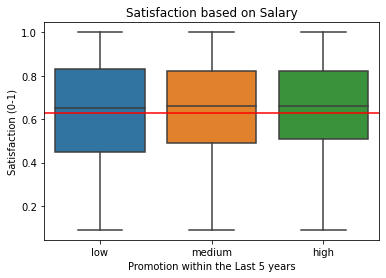

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots()
fig = sns.boxplot(x = df0_subset['salary'], y = df0_subset['satisfaction_level'], ax = ax)
ax.set_title('Satisfaction based on Salary')
ax.set_xlabel('Promotion within the Last 5 years')
ax.set_ylabel('Satisfaction (0-1)')
ax.axhline(df0_subset['satisfaction_level'].mean(), color = 'red')
plt.show()

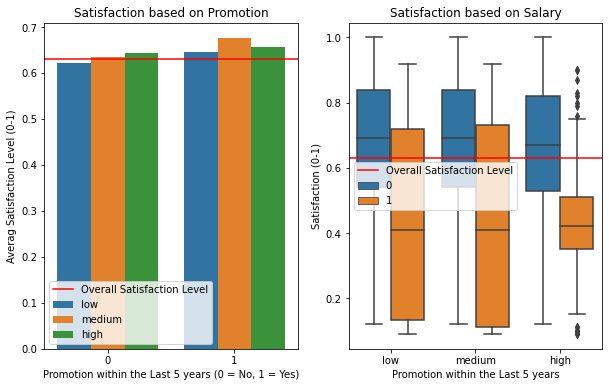

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize = (10,6))
sns.barplot(data = df0_subset, x = 'promotion_last_5years', y = 'satisfaction_level', hue = 'salary', ax = ax[0], ci = None)
ax[0].set_title('Satisfaction based on Salary')
ax[0].set_xlabel('Promotion within the Last 5 years (0 = No, 1 = Yes)')
ax[0].set_ylabel('Averag Satisfaction Level (0-1)')
ax[0].axhline(df0_subset['satisfaction_level'].mean(), color = 'red', label= 'Overall Satisfaction Level')
ax[0].legend()


sns.boxplot(x = df0_subset['salary'], y = df0_subset['satisfaction_level'], hue = df0_subset['left'], ax = ax[1])
ax[1].set_title('Satisfaction based on Promotion')
ax[1].set_xlabel('Promotion within the Last 5 years')
ax[1].set_ylabel('Satisfaction (0-1)')
ax[1].axhline(df0_subset['satisfaction_level'].mean(), color = 'red', label = 'Overall Satisfaction Level')
ax[1].legend()
plt.show()

# We can see that regardless of leaving or not, there was not a big difference between the satisfaction level between them
# 

In [9]:
# Create a plot as needed
### YOUR CODE HERE ###
df0_subset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


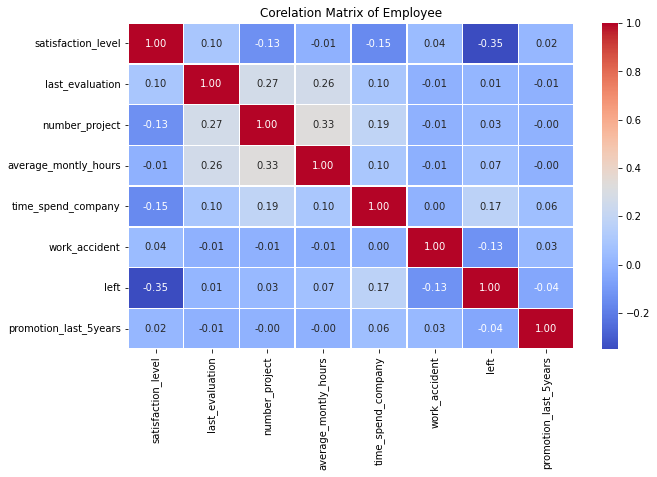

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
corr_matrix = df0_subset.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths=0.5)
plt.title("Corelation Matrix of Employee")
plt.show()

## Looking specifically at relation to Leaving or Not, obviously there is a moderate negative correlation between Satisfaction Level and Leaving (-0.35)
## Not only that there does exist a weak positive correlation between Leaving and Tenure and Work Hours
## Almost no correlation between Promotion and Leaving

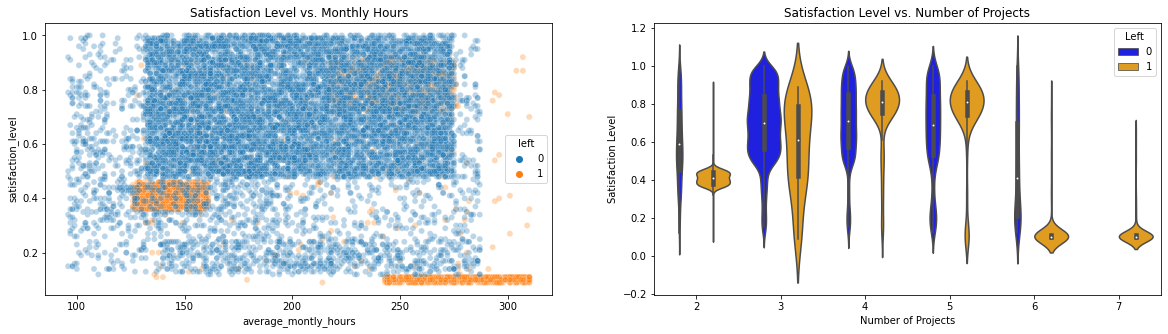

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

sns.scatterplot(data=df0_subset, x='average_montly_hours', y='satisfaction_level', hue = 'left', alpha=0.3, ax = ax[0])
ax[0].set_title("Satisfaction Level vs. Monthly Hours")

sns.violinplot(data=df0_subset, x='number_project', y='satisfaction_level', hue='left', palette={0: 'blue', 1: 'orange'}, dodge=True, ax = ax[1])
ax[1].set_xlabel("Number of Projects")
ax[1].set_ylabel("Satisfaction Level")
ax[1].legend(title="Left")
ax[1].set_title("Satisfaction Level vs. Number of Projects")


plt.show()



### Insights

 - There appears to be a correlation between employee turnover and poor management, longer working hours, and heavy workloads, which may contribute to lower satisfaction.
 - Employees working long hours without receiving promotions or strong performance evaluations may find their work ungratifying.
 - A notable portion of employees might be experiencing burnout.
 - Employees who have been with the company for more than six years seem less likely to leave.
 - Satisfaction levels and the number of projects an employee is involved in show a distributed pattern, but higher satisfaction is generally observed among those handling a moderate workload of 3 to 5 projects.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Your goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the variable you want to predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

So you could proceed with one of the two following approaches. Or, if you'd like, you could implement both and determine how they compare.

I will proceed with both Logistic Regression model and Tree-based Machine Learning model.

### Modeling

Add as many cells as you need to conduct the modeling process.

#### Logistic Regression 

Binomial Logistic Regression is chosen because the independent (y) variable is binary. 

Before we start, we will encode the non-numerical variables, 'department' and 'salary' 

In [7]:
### YOUR CODE HERE ###

## Encoding the dataset and changing the Salary into ordinal categorical variables
df_enc = df0_subset.copy()

df_enc['salary'] = df_enc.salary.map({'low': 0, 'medium': 1, 'high': 2})

df_enc = pd.get_dummies(df_enc, drop_first = False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


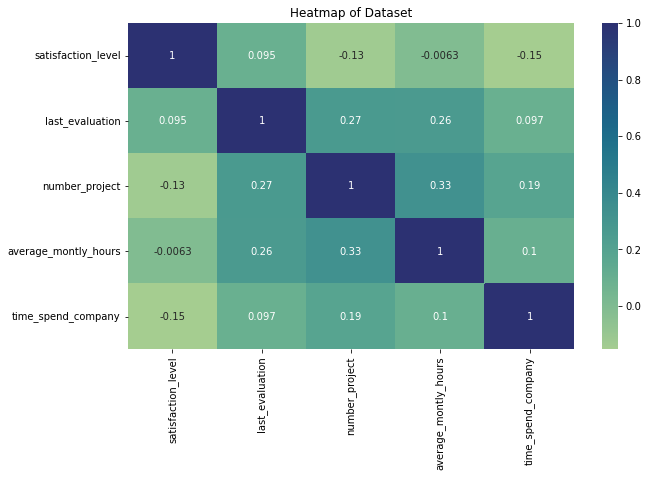

In [8]:
## Making a heatmap to graph the correlation between columns

plt.figure(figsize=(10,6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr(), annot = True, cmap='crest')
plt.title('Heatmap of Dataset')
plt.show()

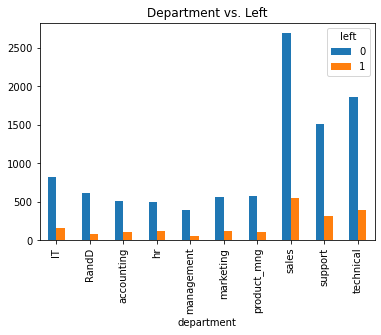

In [9]:
pd.crosstab(df0_subset['department'], df0_subset['left']).plot(kind = 'bar')
plt.title('Department vs. Left')
plt.show()

In [10]:
## Logistic Regression is sensitive to Outliers, so we work without outliers

df_enc_clean = df_enc[(df_enc['time_spend_company']>= low_limit) &(df_enc['time_spend_company']<= upper_limit)]
df_enc_clean.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [11]:
y = df_enc_clean['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [12]:
X = df_enc_clean.drop('left', axis = 1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [14]:
log_clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)

In [15]:
y_pred =log_clf.predict(X_test)

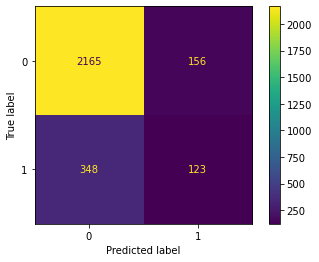

In [16]:
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = log_cm, display_labels = log_clf.classes_)

disp.plot(values_format = '')
plt.show()

In [19]:
df_enc_clean['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [17]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% and accuracy of 82%.


However if we were trying to predict those would leave, then our scores would be significantly lower.

## Tree Based Model

Implementation of a Decision Tree and Random Forest

In [18]:
y = df_enc['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [19]:
X = df_enc.drop('left', axis = 1)

X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [20]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth': [4,6,8, None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]
    
}

scoring= {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree_1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc' )

In [21]:
%%time
tree_1.fit(X_train, y_train)

CPU times: user 2.8 s, sys: 0 ns, total: 2.8 s
Wall time: 2.79 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [22]:
tree_1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [23]:
tree_1.best_score_

0.969819392792457

This is a strong AUC (Area Under Curve) Score, telling us that it is really good a prediction employees who will leave.

In [24]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [75]:
tree_1_cv_results = make_results('deicision tree cv', tree_1, 'auc')
tree_1_cv_results

,model,precision,recall,F1,accuracy,auc
0,deicision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All these numbers are a good indication of the Tree based model. 

Decision tree are vulnerable to overfitting, and random forests can avoid this by utilizing multiple trees.

### Random Forest

Constructing a random forest model and set up cross-validated grid search for the best model parameters

In [26]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [3,5,None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1,2,3],
            'min_samples_split': [2,3,4],
            'n_estimators': [300,500]}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [27]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 14s, sys: 0 ns, total: 9min 14s
Wall time: 9min 14s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [28]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [29]:
rf1.best_score_

0.9804250949807172

In [47]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [48]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


Again, these scores are strong indicators of good model performance.

### Feature Engineering

Because there is a chance of data leakage, we perform feature engineering.
We will proceed by dropping 'satisfaction_level' and creating a new feature.

In [49]:
df2 = df_enc.drop('satisfaction_level', axis = 1)
df2.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [61]:
df2['overworked'] = df2['average_montly_hours']
print('Highest Hours Worked Monthly Average: ', df2['overworked'].max())
print('Lowest Hours Worked Monthly Average: ', df2['overworked'].min())

Highest Hours Worked Monthly Average:  310
Lowest Hours Worked Monthly Average:  96


In [62]:
df2['overworked'] = (df2['overworked'] > 172).astype(int)
df2['overworked'].value_counts()

1    7844
0    4147
Name: overworked, dtype: int64

In [63]:
df2 = df2.drop('average_montly_hours', axis =1)
df2.head()

,last_evaluation,number_project,time_spend_company,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [65]:
y = df2['left']

X = df2.drop('left', axis = 1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, stratify = y, random_state = 0)

tree = DecisionTreeClassifier(random_state = 0)

cv_params = {'max_depth': [4,6,8,None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split': [2,4,6]
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [69]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.34 s, sys: 0 ns, total: 2.34 s
Wall time: 2.34 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [70]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [72]:
tree2.best_score_

0.9582811042135597

In [78]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree_1_cv_results)
print(tree2_cv_results)


               model  precision    recall        F1  accuracy       auc
0  deicision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall       F1  accuracy       auc
0  decision tree2 cv   0.858261  0.900202  0.87838  0.958523  0.958281


#### Random Forest - Round 2


In [84]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7,1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300,500]
}

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv =4, refit= 'roc_auc')

In [85]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 6min 55s, sys: 0 ns, total: 6min 55s
Wall time: 6min 55s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [86]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [88]:
rf2.best_score_

0.9650241793427095

In [89]:
rf2_cv_results = make_results('random forect2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall       F1  accuracy       auc
0  decision tree2 cv   0.858261  0.900202  0.87838  0.958523  0.958281
               model  precision    recall        F1  accuracy       auc
0  random forect2 cv   0.861352  0.873392  0.867135  0.955632  0.965024


In [90]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.86965,0.89759,0.883399,0.96064,0.935395


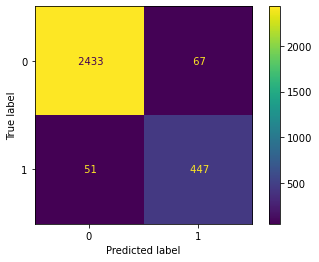

In [92]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2.classes_)

disp.plot(values_format = ' ')

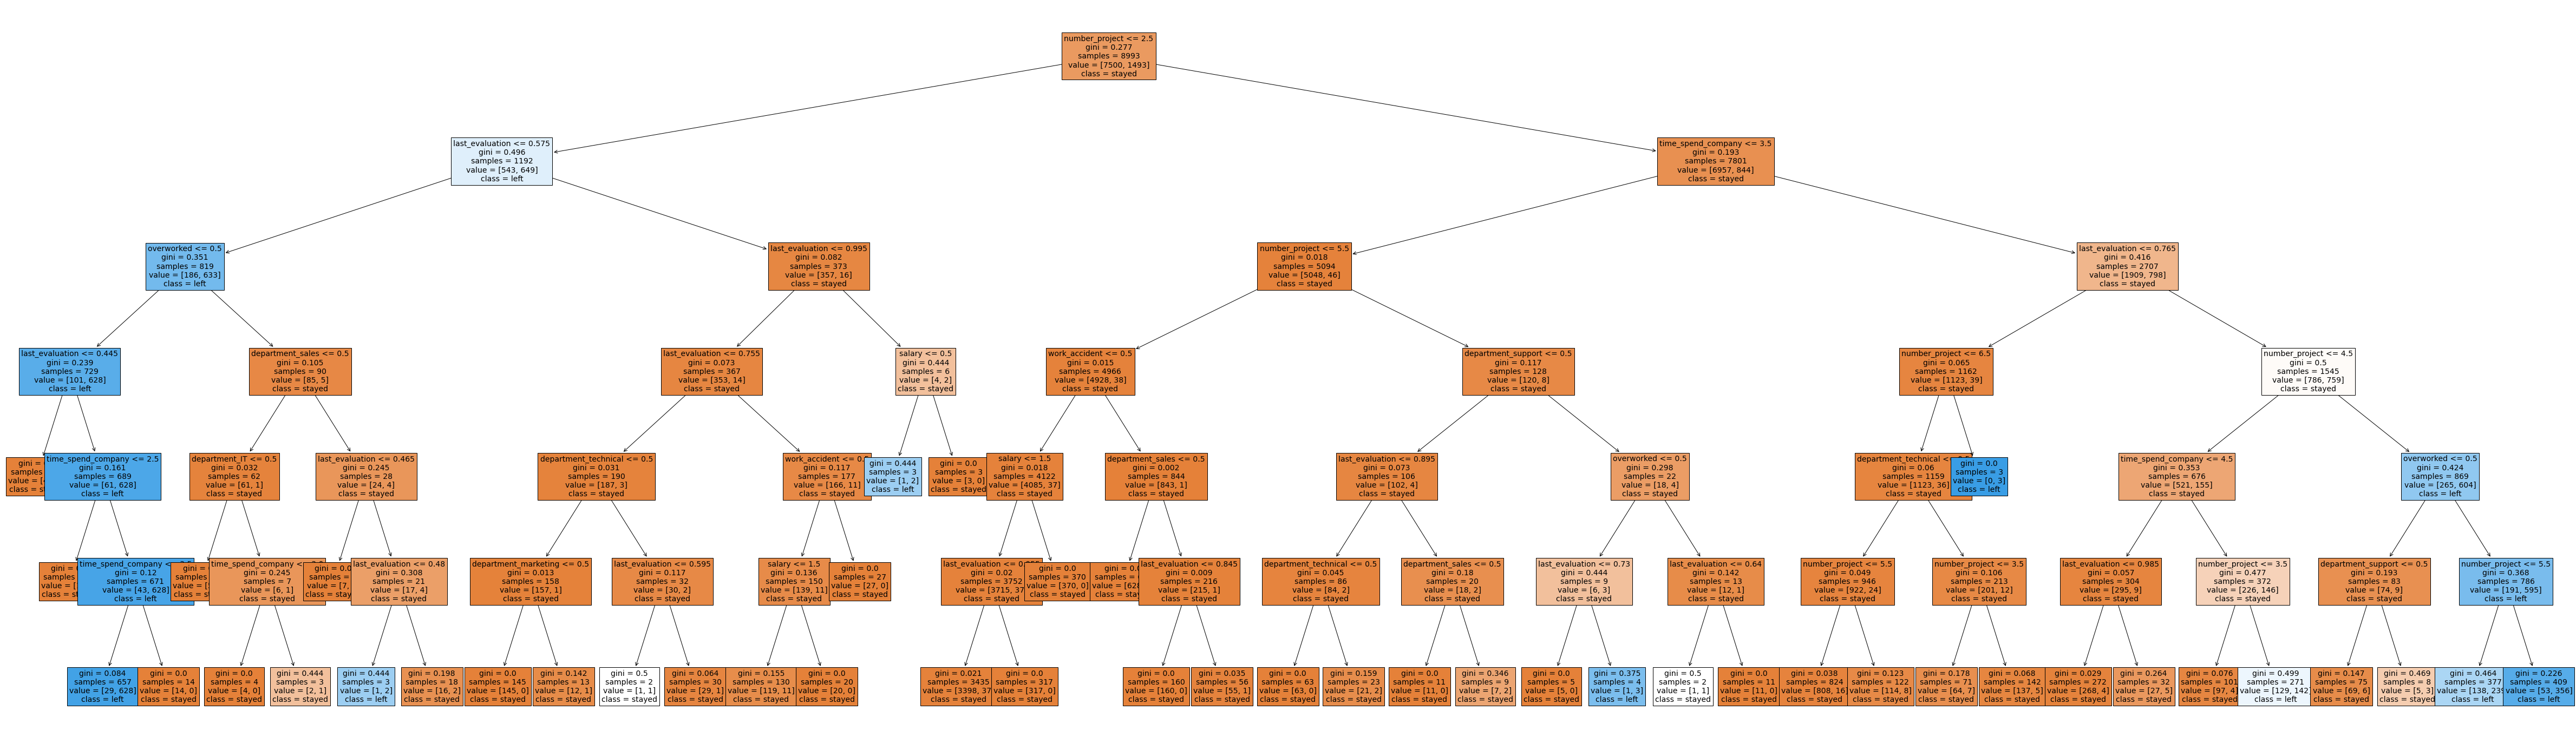

In [93]:
plt.figure(figsize = (85,25))
plot_tree(tree2.best_estimator_, max_depth = 6, fontsize = 14, feature_names = X.columns, class_names= {0:'stayed', 1:'left'}, filled = True)
plt.show()

In [94]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = ['gini_importance'], index = X.columns)
tree2_importances = tree2_importances.sort_values(by = 'gini_importance', ascending = False)
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.344453
number_project,0.344140
time_spend_company,0.215078
overworked,0.092867
department_support,0.001114
salary,0.000911
department_sales,0.000617
department_technical,0.000418
work_accident,0.000183
department_IT,0.000140


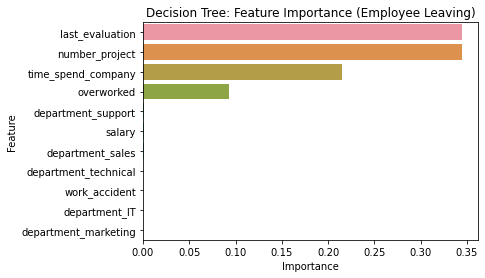

In [96]:
sns.barplot(data = tree2_importances, x = 'gini_importance', y = tree2_importances.index, orient = 'h')
plt.title('Decision Tree: Feature Importance (Employee Leaving)')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.show()

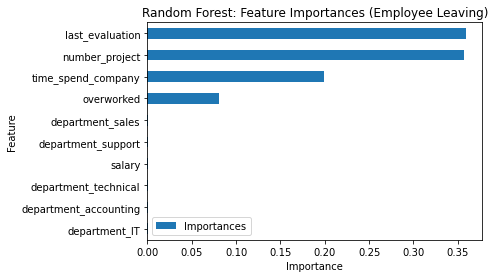

In [97]:
feature_importances = rf2.best_estimator_.feature_importances_

ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

features = X.columns[ind]

feature_importances = feature_importances[ind]

y_df = pd.DataFrame({'Feature':features, 'Importances':feature_importances})
y_sort_df = y_df.sort_values('Importances')

fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind = 'barh', ax = ax1, x= 'Feature', y = 'Importances')

ax1.set_title('Random Forest: Feature Importances (Employee Leaving)', fontsize = 12)
ax1.set_ylabel('Feature')
ax1.set_xlabel('Importance')

plt.show()



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






###### Summary of Models:

**Logistic Regression**
The logisitc regression model had a precision of 80%, recall of 83%, f1-score of 80%, and accuracy of 83% on the test set.


**Tree-based Machine Learning**
After feature engineering, the Decision Tree model had AUC level of 93.8%, precision of 87%, recall of 90.4%, f1-score 88.7%, and accuracy of 96.2%

 **Insights**:

The models and their extracted feature importances indicate that employees at the company are experiencing overwork.


Hence, to prevent more workers from leaving, the following recommendations can be presented:

- Make sure that employees are getting an moderate amount of projects. Around 3-5 projects.
- Conduct further investigation on why specifically four-year tenured employees tend to be more dissatisfied.
- High evaluation scores shouldn’t be limited to employees working over 200 hours per month. Instead, consider a proportionate scale to fairly reward those who contribute more and put in extra effort.